2025/01/06 15:26:53 INFO mlflow.tracking.fluent: Experiment with name 'Flight_Price_Prediction' does not exist. Creating a new experiment.
2025/01/06 15:27:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/917722092995648639/runs/d89bf1cf90b5410e8200a1c655d7bc05
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/917722092995648639


2025/01/06 15:27:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/917722092995648639/runs/29c6521606a9486ab26a33736eb8bc2c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/917722092995648639


2025/01/06 15:27:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/917722092995648639/runs/65bbf57edfbd478195f6d1a94fa425bf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/917722092995648639


2025/01/06 15:27:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Regression (SVR) at: http://127.0.0.1:5000/#/experiments/917722092995648639/runs/bbfc27fd80f4499cae3965a1670075d7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/917722092995648639


2025/01/06 15:27:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors (KNN) at: http://127.0.0.1:5000/#/experiments/917722092995648639/runs/25a4ea3d2b1b4e13af61dd63e84b9c88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/917722092995648639
                             Model          MAE           MSE        R²
1                    Random Forest   649.512766  2.042607e+06  0.903487
2                    Decision Tree   688.406255  2.725283e+06  0.871230
4        K-Nearest Neighbors (KNN)  1286.446514  4.791912e+06  0.773582
0                Linear Regression  2461.547794  1.189583e+07  0.437920
3  Support Vector Regression (SVR)  3408.419082  2.016952e+07  0.046988


C:\Users\ashwi\AppData\Local\Temp\ipykernel_10136\341498185.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[0], palette='viridis')
C:\Users\ashwi\AppData\Local\Temp\ipykernel_10136\341498185.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[1], palette='magma')
C:\Users\ashwi\AppData\Local\Temp\ipykernel_10136\341498185.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, ax=axes[2], palette='plasma')


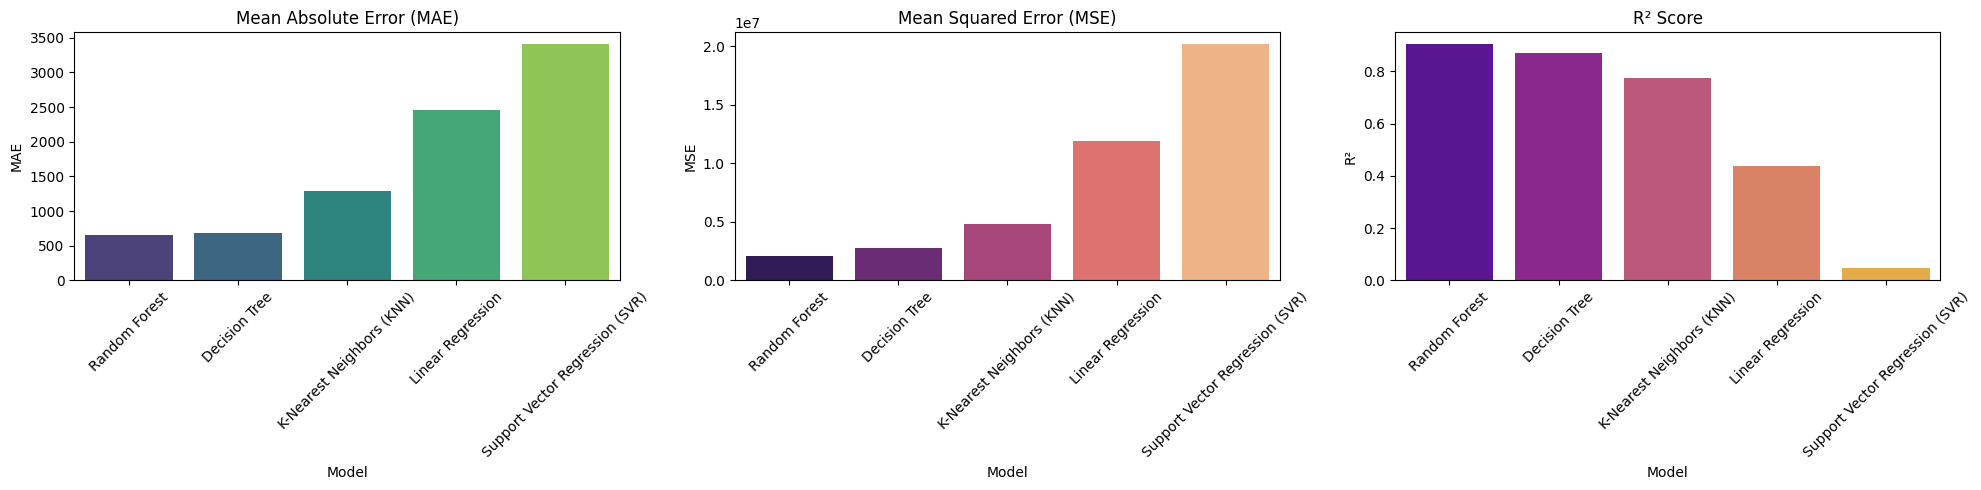

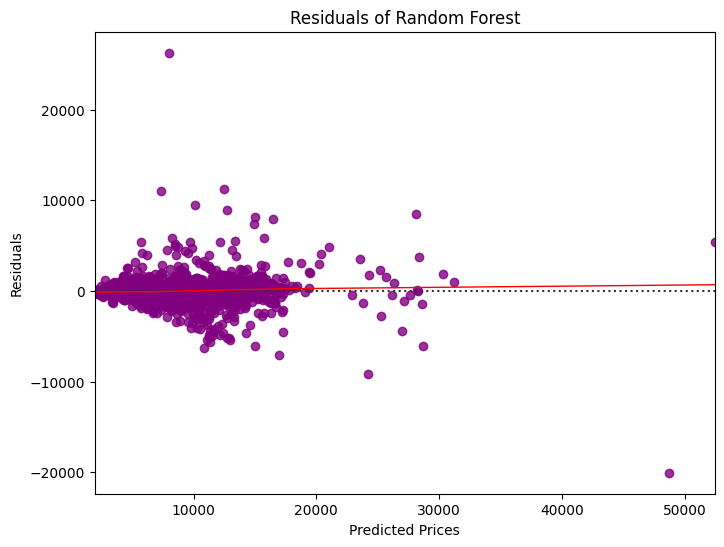

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv(r"C:\Users\ashwi\GUVI_Projects\Flight Project\Flight_Price_Cleaned.csv")

# Feature and target selection
X = df.drop(columns=['Price'])  # Replace 'Price' with your target column
y = df['Price']  # Replace 'Price' with your target column

# Handle missing values
X = X.fillna("Unknown")

# Encode categorical columns
categorical_cols = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
label_encoder = LabelEncoder()

for col in categorical_cols:
    if col in X.columns:
        X[col] = label_encoder.fit_transform(X[col].astype(str))

# Process 'Intermediate_Stops' (convert to count of stops)
X['Intermediate_Stops'] = X['Intermediate_Stops'].apply(lambda x: len(x.split(',')) if x != "NIL" else 0)

# Process 'Dep_Time' and 'Arrival_Time' (convert to minutes since midnight)
def time_to_minutes(time_str):
    try:
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except ValueError:
        return 0  # Handle unexpected formats

X['Dep_Time'] = X['Dep_Time'].apply(time_to_minutes)
X['Arrival_Time'] = X['Arrival_Time'].apply(time_to_minutes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor()
}

# Set MLflow tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Flight_Price_Prediction")

# Train and evaluate models
results = []

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R2", r2)

        # Log model
        mlflow.sklearn.log_model(model, "model")

        # Log parameters (if applicable)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Append results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "R²": r2
        })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display results sorted by R² (best model at the top)
results_df = results_df.sort_values(by="R²", ascending=False)
print(results_df)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot MAE
sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Plot MSE
sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[1], palette='magma')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Plot R²
sns.barplot(x="Model", y="R²", data=results_df, ax=axes[2], palette='plasma')
axes[2].set_title('R² Score')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

# Residuals plot for best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_best, y=residuals, lowess=True, color='purple', line_kws={'color': 'red', 'lw': 1})
plt.title(f'Residuals of {best_model_name}')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()
